In [ ]:
import re
import numpy as np
class Bot:
    def __init__(self, id, start, destination):
        self.id = id
        self.position = start  # Starting position on the grid (row, col)
        self.destination = destination  # Destination position on the grid (row, col)
        self.commands = []  # Pathfinding commands
        self.direction = 0  # Initial direction (0: North, 1: East, 2: South, 3: West)

    def is_within_grid(self, position, grid):
        """Check if the position is within the bounds of the grid."""
        rows, cols = len(grid), len(grid[0])
        return 0 <= position[0] < rows and 0 <= position[1] < cols

    def forward(self, grid):
        """Move forward based on current direction only if the new position is valid."""
        new_position = self.position  # Start with the current position
        if self.direction == 0:  # North
            new_position = (self.position[0] - 1, self.position[1])
        elif self.direction == 1:  # East
            new_position = (self.position[0], self.position[1] + 1)
        elif self.direction == 2:  # South
            new_position = (self.position[0] + 1, self.position[1])
        elif self.direction == 3:  # West
            new_position = (self.position[0], self.position[1] - 1)

        # Update position only if it's valid
        if self.is_within_grid(new_position, grid) and grid[new_position[0]][new_position[1]] != 'X':
            self.position = new_position
        else:
            return -1

    def reverse(self, grid):
        """Move backward based on current direction only if the new position is valid."""
        new_position = self.position  # Start with the current position
        if self.direction == 0:  # North
            new_position = (self.position[0] + 1, self.position[1])
        elif self.direction == 1:  # East
            new_position = (self.position[0], self.position[1] - 1)
        elif self.direction == 2:  # South
            new_position = (self.position[0] - 1, self.position[1])
        elif self.direction == 3:  # West
            new_position = (self.position[0], self.position[1] + 1)

        # Update position only if it's valid
        if self.is_within_grid(new_position, grid) and grid[new_position[0]][new_position[1]] != 'X':
            self.position = new_position
        else:
            return -1

    # ... [Rest of the Bot class methods remain unchanged]


    def left(self):
        """Turn left (counterclockwise)."""
        self.direction = (self.direction - 1) % 4

    def right(self):
        """Turn right (clockwise)."""
        self.direction = (self.direction + 1) % 4

    def wait(self):
        """Wait without moving."""
        pass
    def manhattan_distance(self, pos):
        """Calculate the Manhattan distance from a given position to the destination."""
        return abs(pos[0] - self.destination[0]) + abs(pos[1] - self.destination[1])

def pathfinding(bot,grid, bots):
    """
    Placeholder for a pathfinding algorithm.
    It should generate a list of movement commands (forward, right, left, etc.).
    """
    test = bot.position




    return ""

def simulate(grid, bots):
    """
    Simulate bot movements over the grid for a given number of time steps.
    """
    total_time = 0
    while  all_destination_reach(bots)==False:
        for bot in bots:
            if bot.position == bot.destination:
               break
            else:
                bot.commands.append(pathfinding(bot,grid , bots))
        total_time += 1
    return total_time


def all_destination_reach(bots):
    for bot in bots:
        if bot.position != bot.destination:
            return False
    return True



grid = [
    ['A1', '.', '.', 'X', 'B1'],
    ['A3', 'X', '.', '.', '.'],
    ['.', '.', 'X', '.', '.'],
    ['.', '.', '.', 'B3', '.'],
    ['A2', 'X', '.', '.', 'B2']
]

bots = []
bot_destinations = {}

for i in range(len(grid)):
    for j in range(len(grid[0])):
        cell = grid[i][j]
        if cell[0] == 'A':
            bot_id = cell  # The bot ID is something like 'A1'
            bots.append(Bot(bot_id, (i, j), None))  # Destination will be assigned later
        elif cell[0] == 'B':  # Detect destinations (e.g., 'B1', 'B2')
            bot_id = 'A' + cell[1]  # The bot's ID that corresponds to this destination
            bot_destinations[bot_id] = (i, j)  # Save the destination for bot

# Step 2: Assign the destination to each bot based on the 'B' entries
for bot in bots:
    bot.destination = bot_destinations[bot.id]  # Set destination for the bot


tt = simulate(grid, bots)

# Optional: Print bot details to see how they are set up
for bot in bots:
    print(f"Bot {bot.id}: Start {bot.position}, Destination {bot.destination}, Commands: {bot.commands}, total time {tt}")


IndentationError: unexpected indent (<ipython-input-4-6303c6e1da82>, line 51)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# Actions the bot can take
ACTIONS = ['forward', 'left', 'right', 'wait', 'reverse']
ACTION_MAP = {0: 'forward', 1: 'left', 2: 'right', 3: 'wait', 4: 'reverse'}

class Bot:
    def __init__(self, id, start, destination, grid_size):
        self.id = id
        self.position = start  # Starting position (i, j)
        self.destination = destination  # Destination position
        self.direction = 0  # Facing direction (0: North, 1: East, 2: South, 3: West)
        self.grid_size = grid_size
        self.q_table = np.zeros((grid_size * grid_size * 5, len(ACTIONS)))  # Q-table initialization
        self.total_time = 0  # Total time taken to reach the destination

    def get_state(self):
        """Returns a unique state ID based on the current position and direction."""
        return self.position[0] * self.grid_size + self.position[1] + self.direction * self.grid_size * self.grid_size

    def move(self, action):
        """Perform the action and update the bot's position and direction."""
        if action == 0:  # Forward
            if self.direction == 0 and self.position[0] > 0:  # North
                self.position = (self.position[0] - 1, self.position[1])
            elif self.direction == 1 and self.position[1] < self.grid_size - 1:  # East
                self.position = (self.position[0], self.position[1] + 1)
            elif self.direction == 2 and self.position[0] < self.grid_size - 1:  # South
                self.position = (self.position[0] + 1, self.position[1])
            elif self.direction == 3 and self.position[1] > 0:  # West
                self.position = (self.position[0], self.position[1] - 1)
        elif action == 1:  # Turn left
            self.direction = (self.direction - 1) % 4
        elif action == 2:  # Turn right
            self.direction = (self.direction + 1) % 4
        # 'wait' action does nothing (action == 3)

        self.total_time += 1  # Each action takes 1 unit of time

    def reward(self):
        """Calculate reward based on the current position."""
        if self.position == self.destination:
            return 100  # High reward for reaching destination
        elif grid[self.position[0]][self.position[1]] == 'X':
            return -10  # Penalty for hitting an obstacle
        else:
            return -1  # Negative reward for every move to encourage reaching the destination faster

    def q_learning(self, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
        """Q-learning algorithm."""
        for episode in range(episodes):
            self.position = (random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1))  # Random start
            self.direction = random.randint(0, 3)  # Random direction

            for step in range(100):  # Limit steps to avoid infinite loops
                state = self.get_state()

                # Epsilon-greedy action selection
                if random.uniform(0, 1) < epsilon:
                    action = random.randint(0, len(ACTIONS) - 1)  # Explore
                else:
                    action = np.argmax(self.q_table[state])  # Exploit

                # Move the bot based on the chosen action
                self.move(action)
                next_state = self.get_state()

                # Receive reward
                reward = self.reward()

                # Q-learning update rule
                best_next_action = np.argmax(self.q_table[next_state])
                self.q_table[state, action] += alpha * (reward + gamma * self.q_table[next_state, best_next_action] - self.q_table[state, action])

                # Check if the bot reached its destination
                if self.position == self.destination:
                    break

# Define grid
grid = [
    ['A1', '.', '.', 'X', 'B1'],
    ['.', 'X', '.', '.', '.'],
    ['.', '.', 'X', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['A2', 'X', '.', '.', 'B2']
]

grid_size = len(grid)  # Size of the grid

bots = []
bot_destinations = {}

# Initialize bots and destinations
for i in range(len(grid)):
    for j in range(len(grid[0])):
        cell = grid[i][j]
        if cell[0] == 'A':
            bot_id = cell  # The bot ID is something like 'A1'
            bots.append(Bot(bot_id, (i, j), None, grid_size))  # Correctly initialize Bot with grid_size
        elif cell[0] == 'B':  # Detect destinations (e.g., 'B1', 'B2')
            bot_id = 'A' + cell[1]  # The bot's ID that corresponds to this destination
            bot_destinations[bot_id] = (i, j)  # Save the destination for bot

# Step 2: Assign the destination to each bot based on the 'B' entries
for bot in bots:
    bot.destination = bot_destinations[bot.id]  # Set destination for the bot
    bot.q_learning(episodes=1000)
    print(f"Q-table for Bot {bot.id}:")
    print(bot.q_table)

def simulate(grid, bots):
    """Simulate the bots moving towards their destinations."""
    all_reached = False
    while not all_reached:
        all_reached = True  # Assume all bots reached until we find one that hasn't
        for bot in bots:
            if bot.position != bot.destination:  # If bot hasn't reached destination
                all_reached = False
                state = bot.get_state()
                action = np.argmax(bot.q_table[state])  # Choose best action based on Q-table
                bot.move(action)  # Move the bot based on the action

                # Print grid state
                print_grid(grid, bots)  # Call to the print function
                time.sleep(0.5)  # Simulate delay for animation

    return sum(bot.total_time for bot in bots)

def print_grid(grid, bots):
    """Print the current state of the grid with bots."""
    grid_copy = [row[:] for row in grid]  # Create a copy of the grid
    for bot in bots:
        grid_copy[bot.position[0]][bot.position[1]] = bot.id  # Place bot on the grid
    for row in grid_copy:
        print(' '.join(row))  # Print the current state of the grid
    print("\n")  # New line for better separation

# Run the simulation
total_time = simulate(grid, bots)

# Optional: Print bot details to see how they are set up
for bot in bots:
    print(f"Bot {bot.id}: Start {bot.position}, Destination {bot.destination}, Total time: {bot.total_time}")

print(f"Total time taken for all bots to reach their destinations: {total_time}")


Q-table for Bot A1:
[[ 1.59486790e+01 -1.35659718e+00  1.10171293e+02 -1.39428818e+00
   4.97257664e+00]
 [-8.64827525e-01 -7.92500460e-01  1.22003202e+02  1.32725017e+01
   5.45712323e+00]
 [-7.72553056e-01 -7.40006613e-01  1.24459449e+02 -7.56195494e-01
  -7.72553056e-01]
 [-1.00000000e+00 -1.00000000e+00  1.03053195e+02  0.00000000e+00
   0.00000000e+00]
 [ 6.79346521e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 8.82606960e+01  1.30278687e+00 -1.69551757e+00  1.99476329e+00
   4.40508342e+00]
 [ 6.09252671e+01 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00]
 [ 8.41179474e+00 -4.10711401e-01  6.61434435e+01 -3.94039900e-01
   4.54328485e+00]
 [-1.00000000e+00 -1.90000000e-01  6.78594458e+01 -1.00000000e-01
  -1.00000000e-01]
 [ 1.60532542e+02  2.22028934e+01  8.62654765e+01  1.05598053e+02
   1.06713027e+02]
 [ 5.27934157e+01 -1.92958869e+00 -1.93580340e+00  1.12603017e+00
  -1.97907805e+00]
 [-2.73947840e+00 -1.93166563e+00  2.99468600

In [ ]:
import numpy as np
import random

class Bot:
    def __init__(self, id, start, destination):
        self.id = id
        self.position = start  # Starting position on the grid (row, col)
        self.destination = destination  # Destination position on the grid (row, col)
        self.q_table = {}  # Q-table for state-action values
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
        self.epsilon = 1.0  # Exploration rate

    def get_state(self):
        return (self.position[0], self.position[1])

    def choose_action(self):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(["forward", "reverse", "left", "right", "wait"])
        else:
            return max(self.q_table.get(self.get_state(), {}), key=self.q_table.get(self.get_state(), {}).get, default="wait")

    def learn(self, state, action, reward, next_state):
        current_q = self.q_table.get(state, {}).get(action, 0)
        max_future_q = max(self.q_table.get(next_state, {}).values(), default=0)
        new_q = current_q + self.alpha * (reward + self.gamma * max_future_q - current_q)
        if state not in self.q_table:
            self.q_table[state] = {}
        self.q_table[state][action] = new_q

    def forward(self):
        self.position = (self.position[0] - 1, self.position[1])  # Move North

    def reverse(self):
        self.position = (self.position[0] + 1, self.position[1])  # Move South

    def left(self):
        self.position = (self.position[0], self.position[1] - 1)  # Move West

    def right(self):
        self.position = (self.position[0], self.position[1] + 1)  # Move East

    def wait(self):
        pass  # Stay in place

def get_reward(bot, grid):
    if bot.position == bot.destination:
        return 10  # Reward for reaching the destination
    elif 0 <= bot.position[0] < len(grid) and 0 <= bot.position[1] < len(grid[0]) and grid[bot.position[0]][bot.position[1]] == 'X':  # Check bounds before accessing grid
        return -10  # Penalty for hitting a wall
    else:
        return -1  # Small penalty for each step taken

def simulate(grid, bots, max_time):
    for episode in range(100):  # Number of training episodes
        for time in range(max_time):
            for bot in bots:
                current_state = bot.get_state()
                action = bot.choose_action()

                # Execute the action and update the bot's position
                if action == "forward":
                    bot.forward()
                elif action == "reverse":
                    bot.reverse()
                elif action == "left":
                    bot.left()
                elif action == "right":
                    bot.right()
                elif action == "wait":
                    bot.wait()

                next_state = bot.get_state()  # Update to the new state
                reward = get_reward(bot, grid)  # Get reward

                bot.learn(current_state, action, reward, next_state)

        # Decrease exploration rate over time
        if bot.epsilon > 0.1:
            bot.epsilon *= 0.995

# Define the grid and initialize bots
grid = [
    ['A1', '.', '.', 'X', 'B1'],
    ['A3', 'X', '.', '.', '.'],
    ['.', '.', 'X', '.', '.'],
    ['.', '.', '.', 'B3', '.'],
    ['A2', 'X', '.', '.', 'B2']
]

bots = []
bot_destinations = {}

for i in range(len(grid)):
    for j in range(len(grid[0])):
        cell = grid[i][j]
        if cell[0] == 'A':
            bot_id = cell
            bots.append(Bot(bot_id, (i, j), None))  # Create bot
        elif cell[0] == 'B':
            bot_id = 'A' + cell[1]  # Corresponding bot ID
            bot_destinations[bot_id] = (i, j)  # Save destination

# Assign destinations to bots
for bot in bots:
    bot.destination = bot_destinations[bot.id]  # Set destination for each bot

# Simulate the bots
max_time = 10
simulate(grid, bots, max_time)

# Print bot details
for bot in bots:
    print(f"Bot {bot.id}: Start {bot.position}, Destination {bot.destination}, Q-table: {bot.q_table}")


Bot A1: Start (22, -9), Destination (0, 4), Q-table: {(0, 0): {'left': -0.1}, (0, -1): {'wait': -0.1, 'reverse': -0.1}, (1, -1): {'left': -0.19981000000000002}, (1, -2): {'right': -0.10900000000000001, 'wait': -0.10981000000000002, 'reverse': -0.1}, (2, -2): {'left': -0.1}, (2, -3): {'reverse': -0.1}, (3, -3): {'reverse': -0.1}, (4, -3): {'left': -0.29927646100000005, 'wait': -0.31310566390000005}, (4, -4): {'right': -0.21608290000000002, 'forward': -0.1}, (3, -4): {'left': -0.1}, (3, -5): {'left': -0.1}, (3, -6): {'left': -0.1}, (3, -7): {'forward': -0.1}, (2, -7): {'wait': -0.1, 'left': -0.1}, (2, -8): {'left': -0.19981000000000002, 'forward': -0.1, 'reverse': -0.1}, (2, -9): {'left': -0.199, 'right': -0.10900000000000001, 'reverse': -0.20863900000000002, 'wait': -0.10981000000000002, 'forward': -0.29758510000000005}, (2, -10): {'forward': -0.288829, 'left': -0.36990051490000003, 'right': -0.10981000000000002}, (1, -10): {'reverse': -0.38380465900000005, 'right': -0.1, 'wait': -0.295

tenser flow

Episode: 900, Total Reward: 200


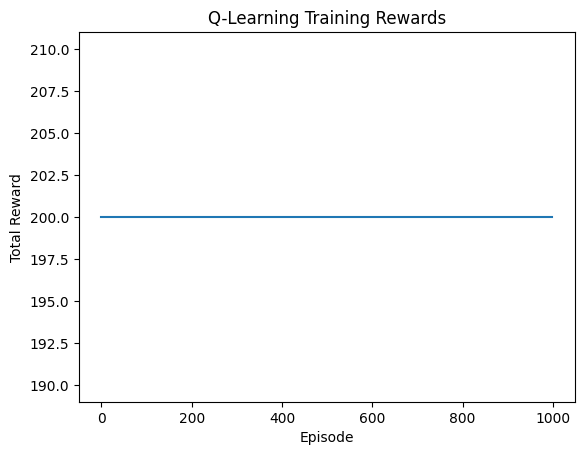

Episode: 0


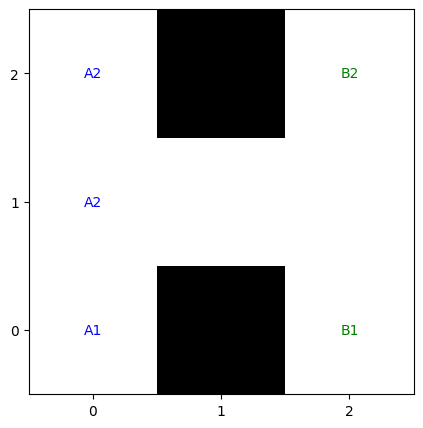

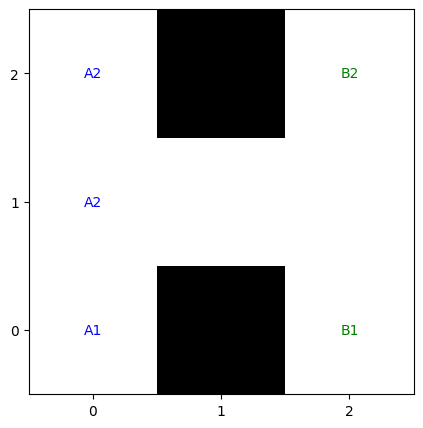

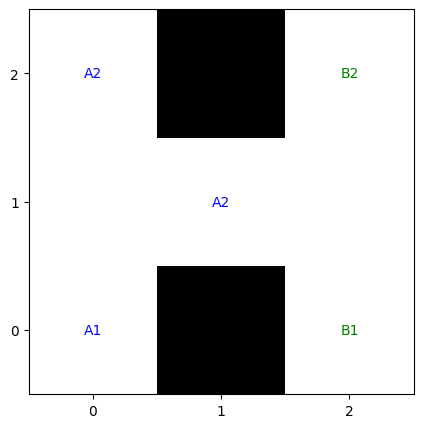

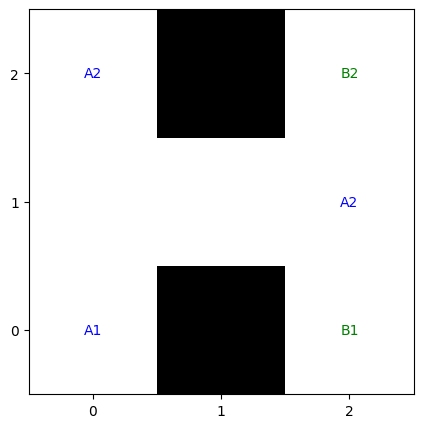

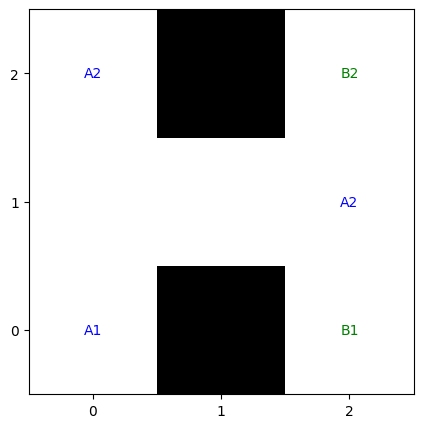

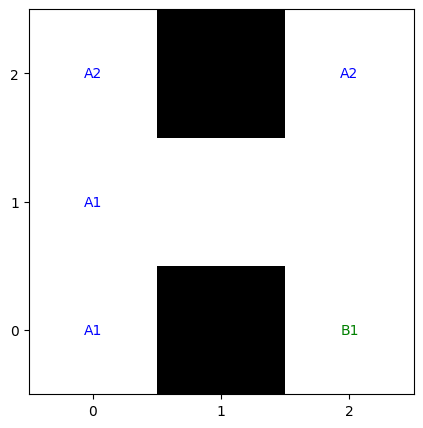

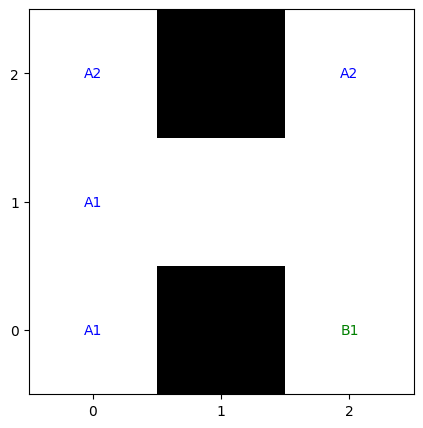

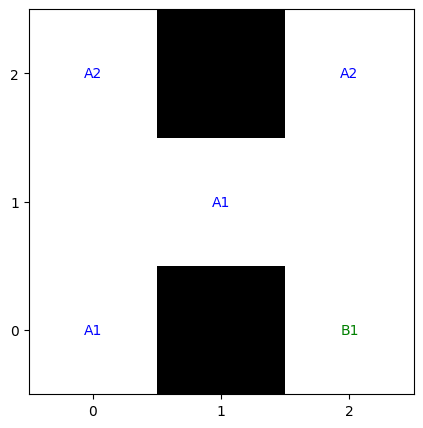

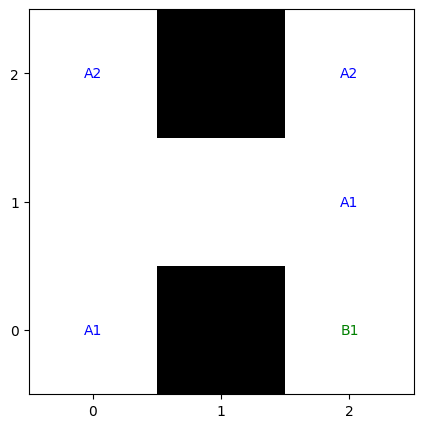

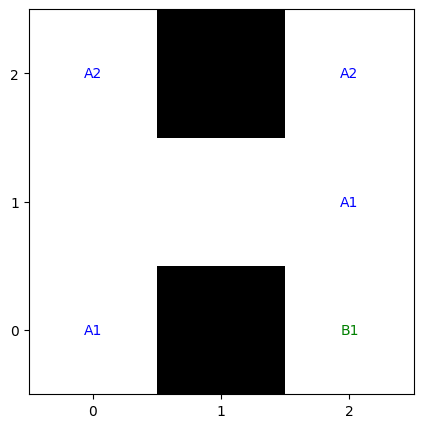

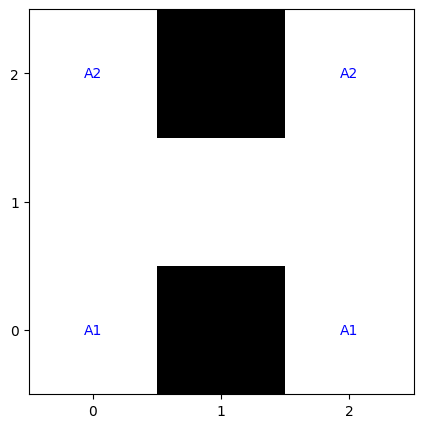

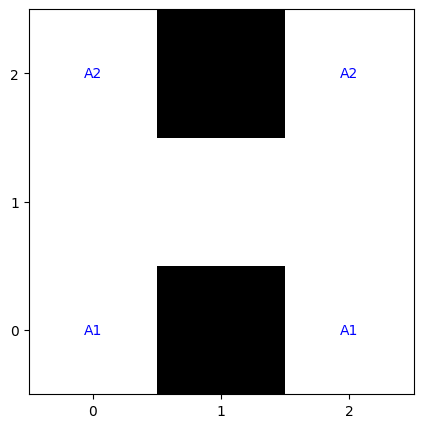

Episode: 1


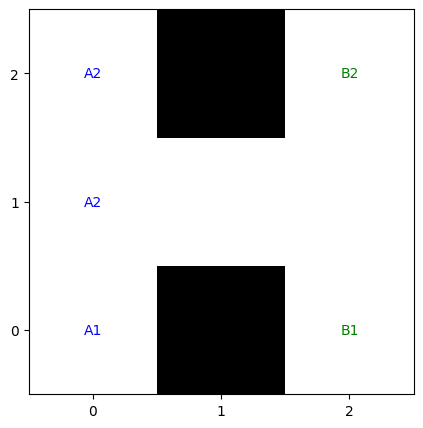

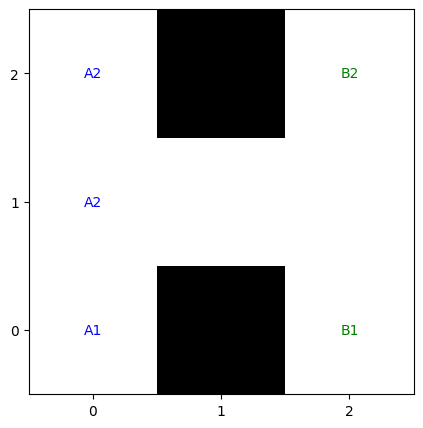

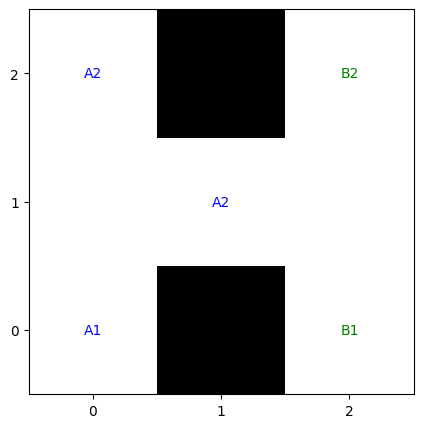

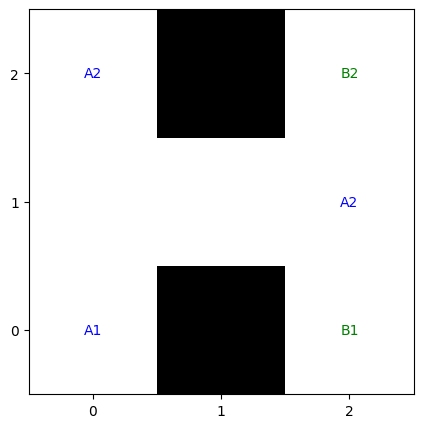

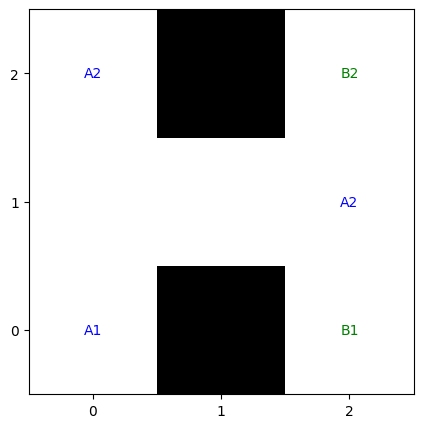

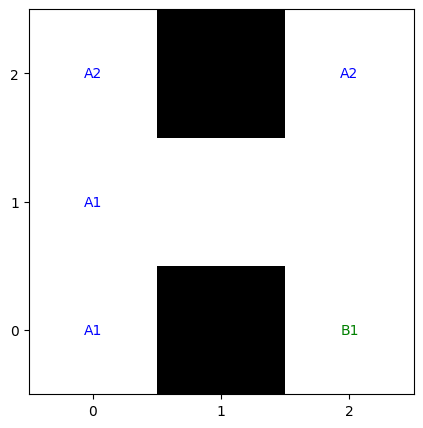

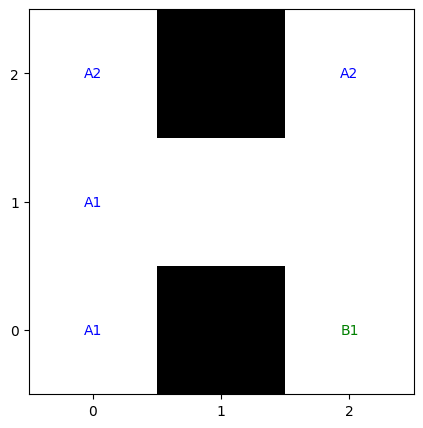

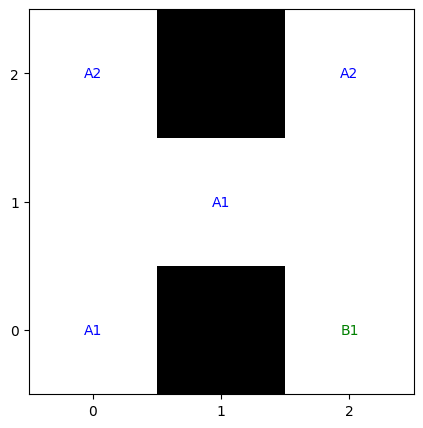

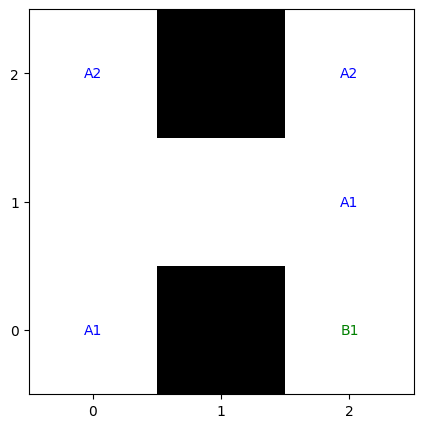

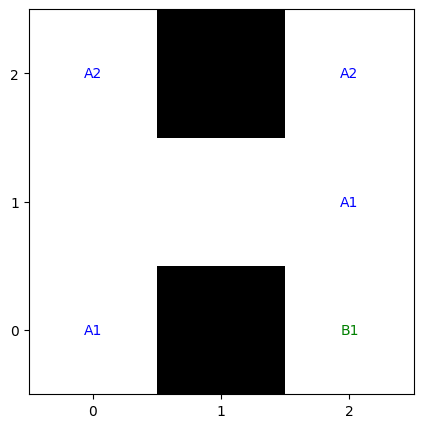

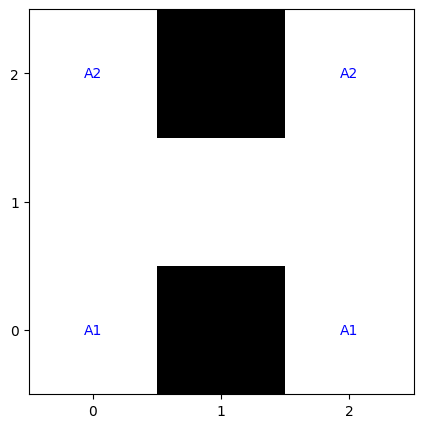

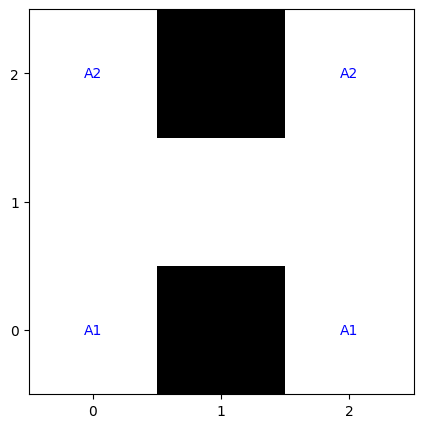

Episode: 2


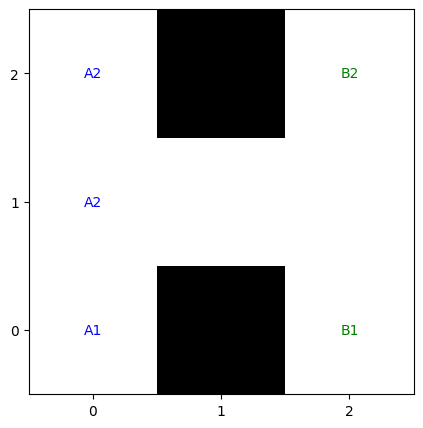

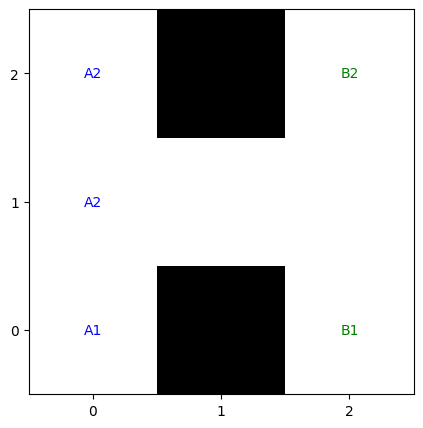

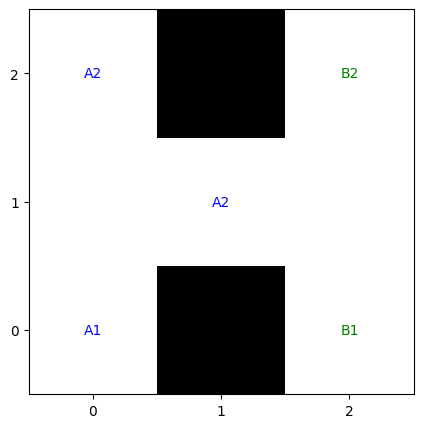

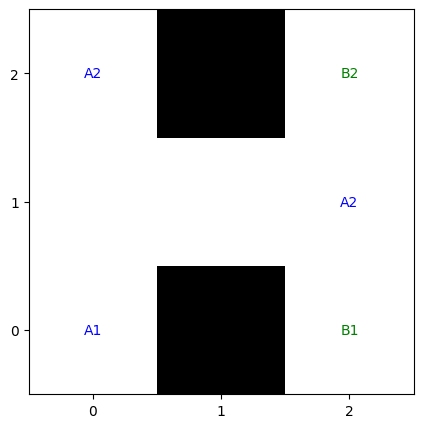

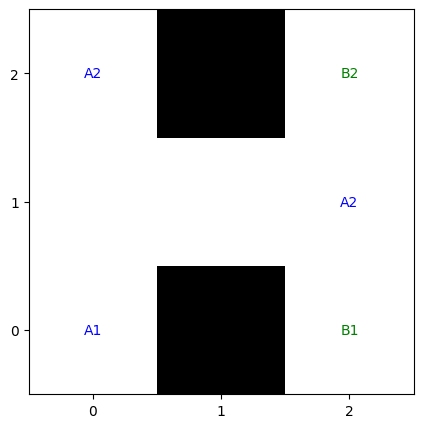

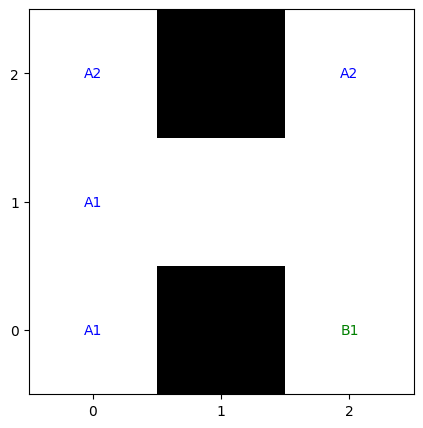

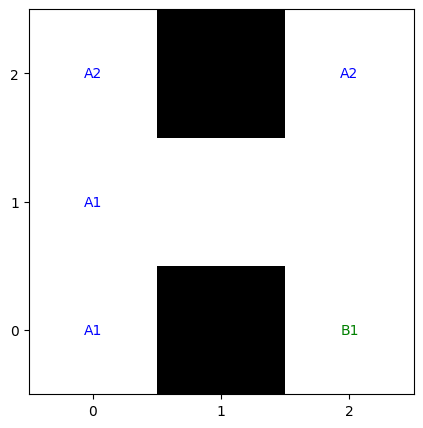

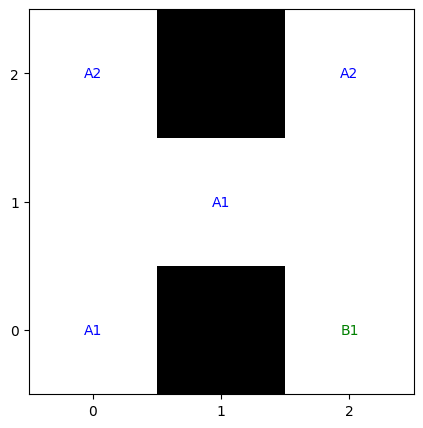

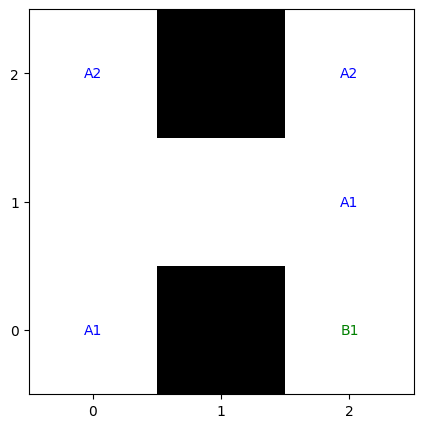

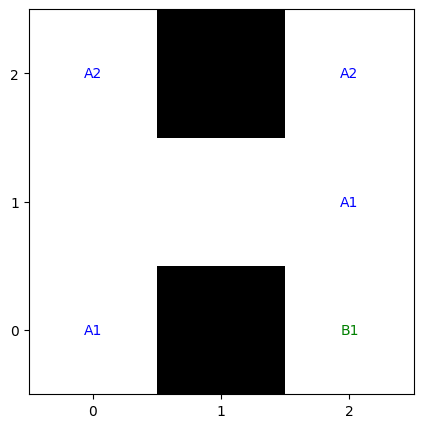

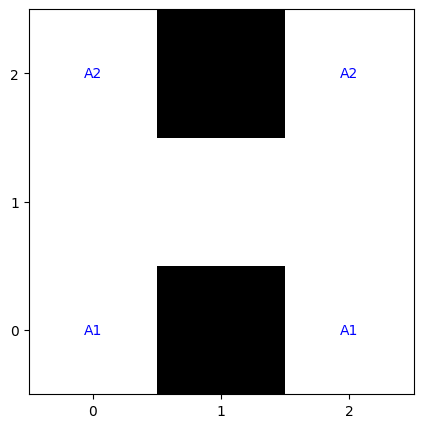

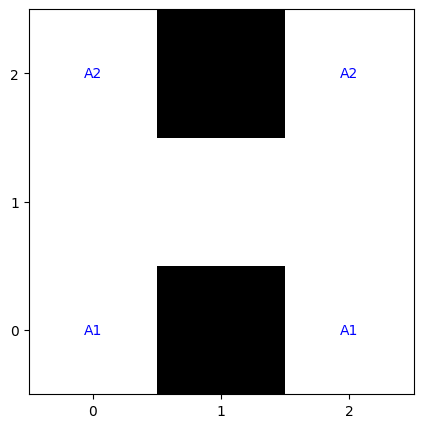

Episode: 3


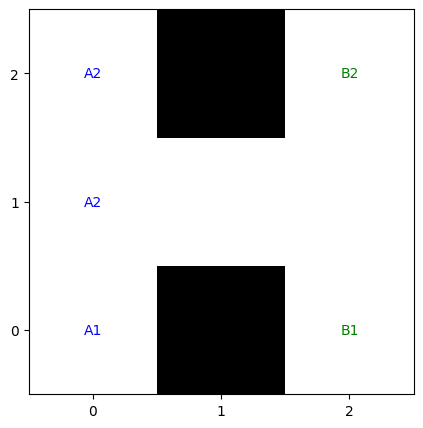

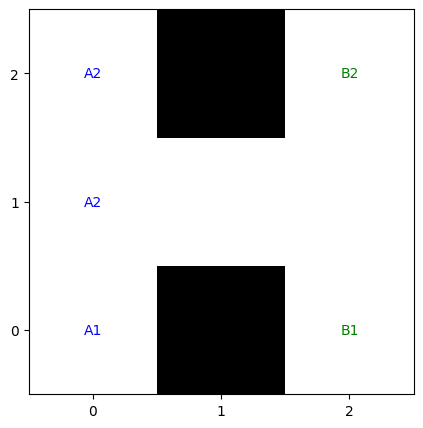

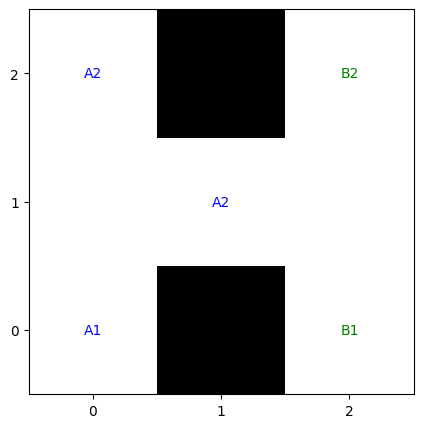

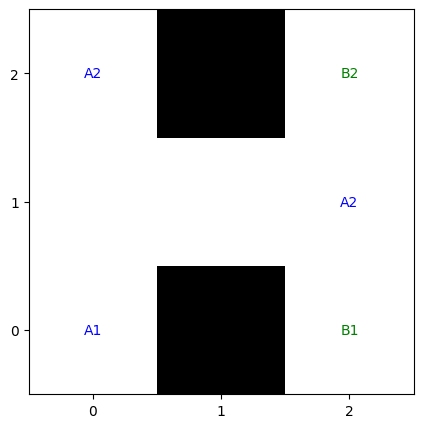

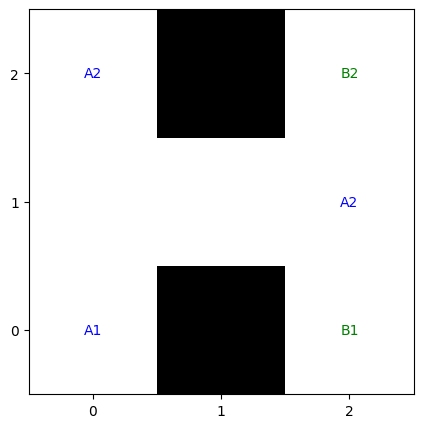

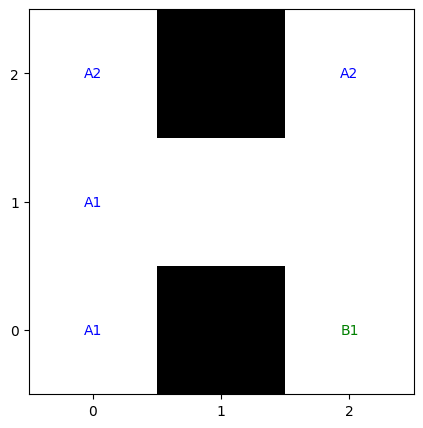

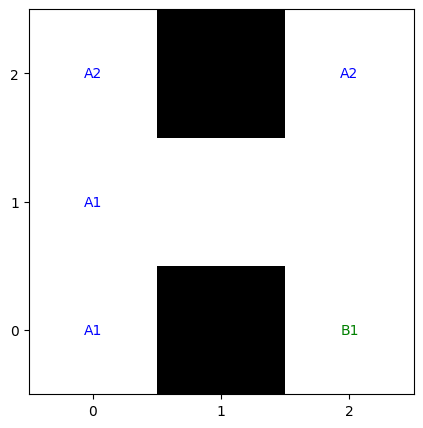

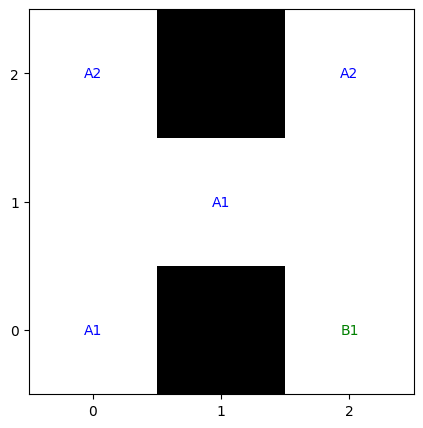

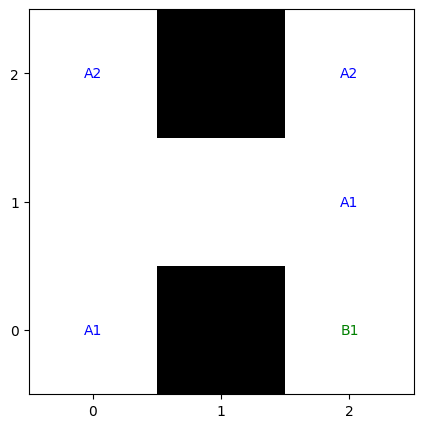

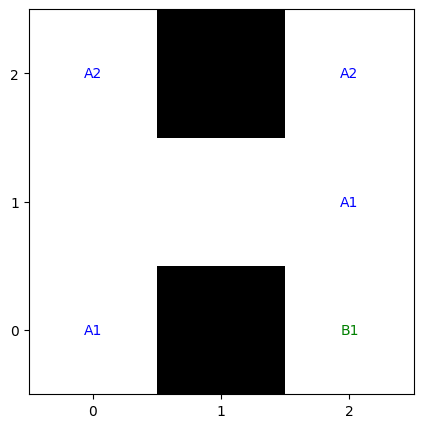

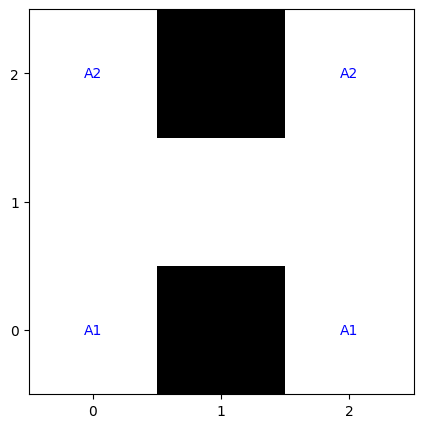

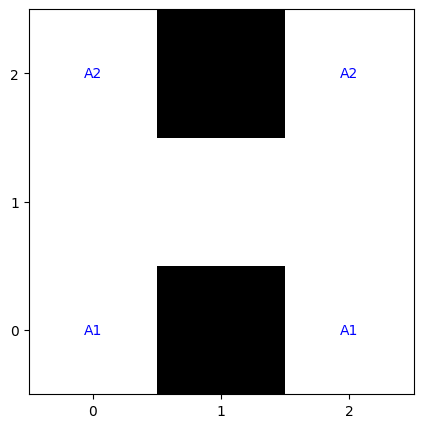

Episode: 4


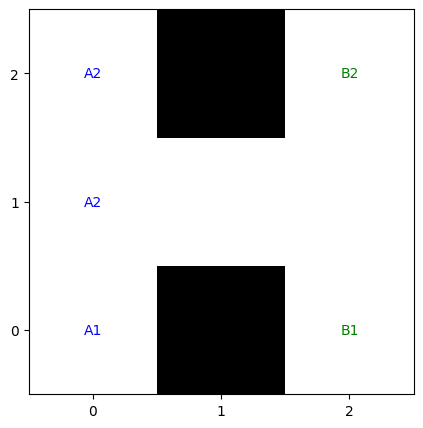

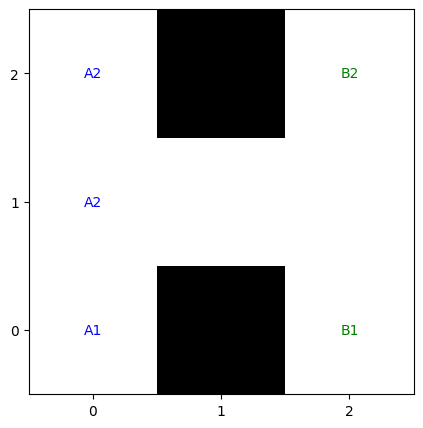

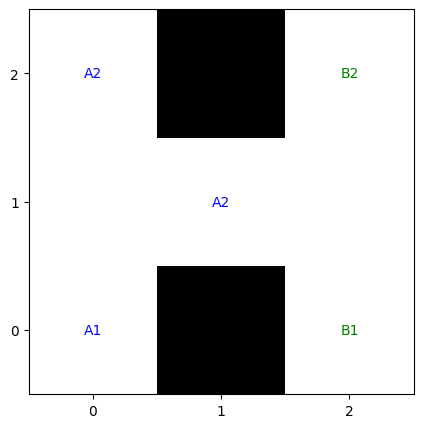

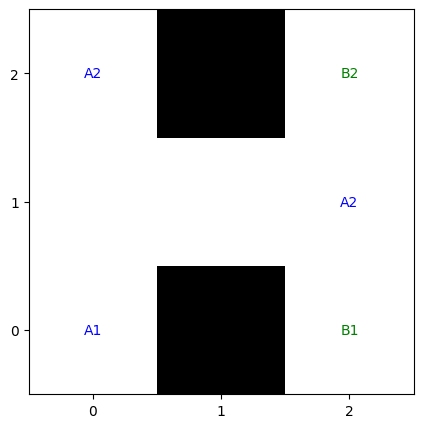

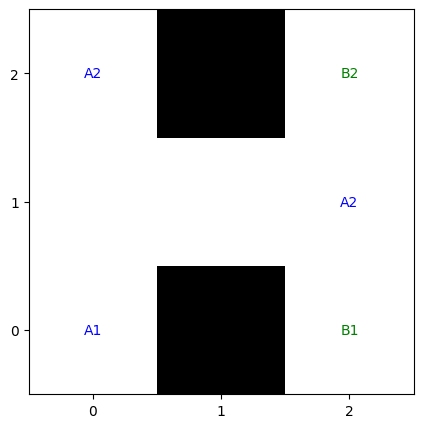

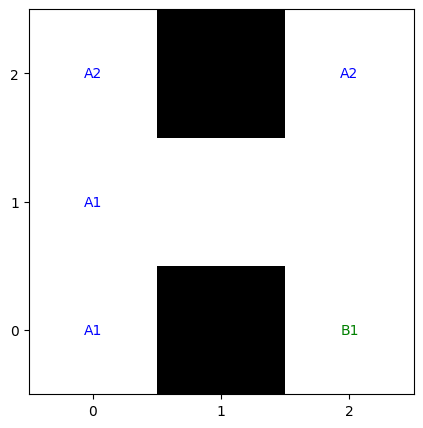

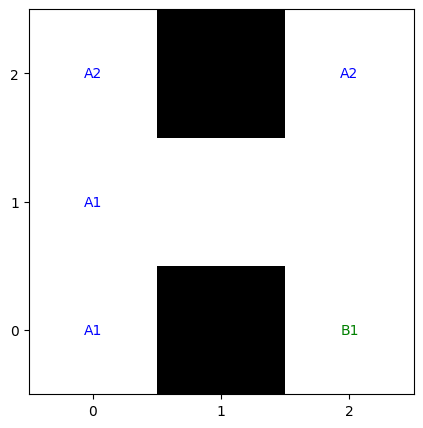

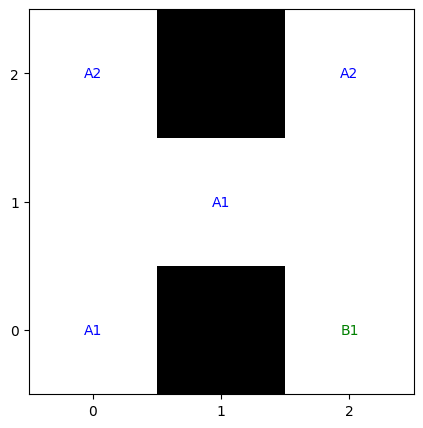

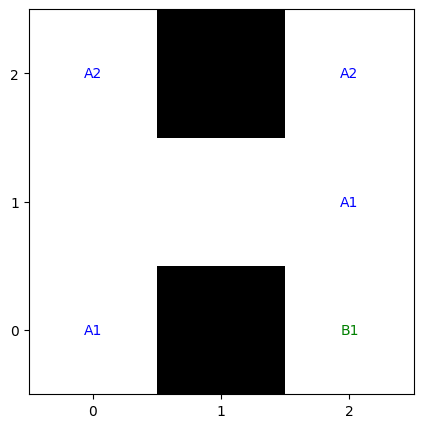

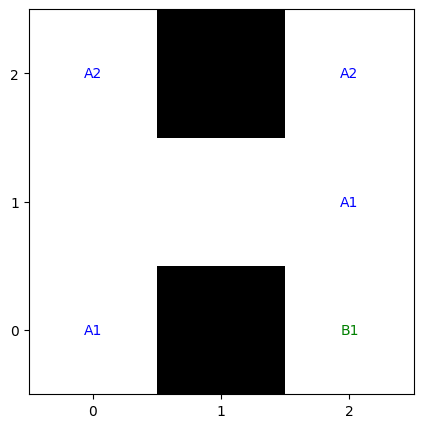

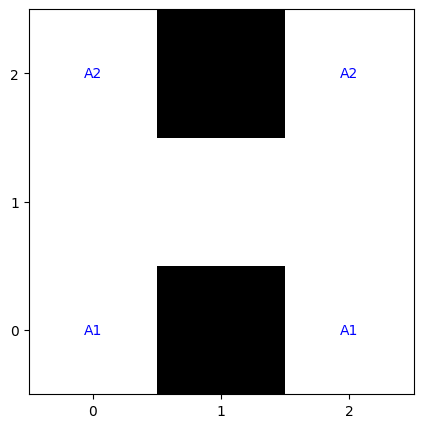

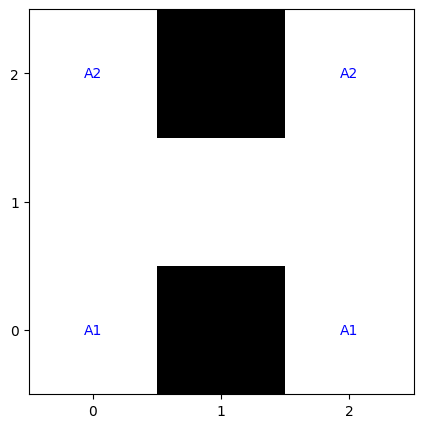

Episode: 5


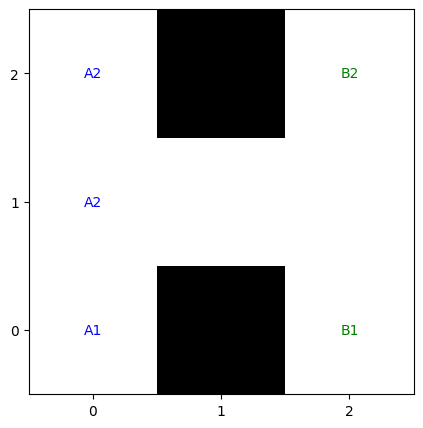

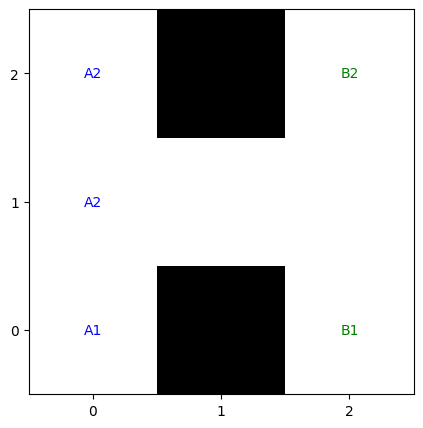

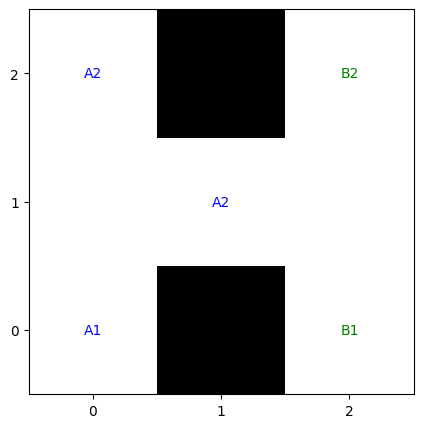

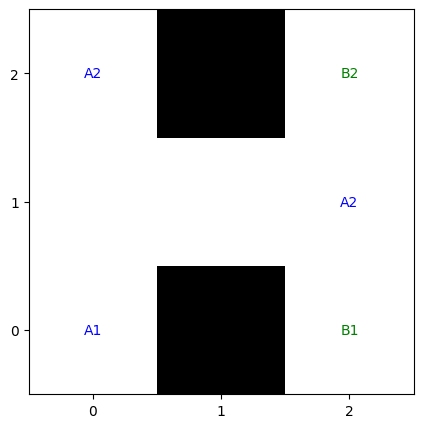

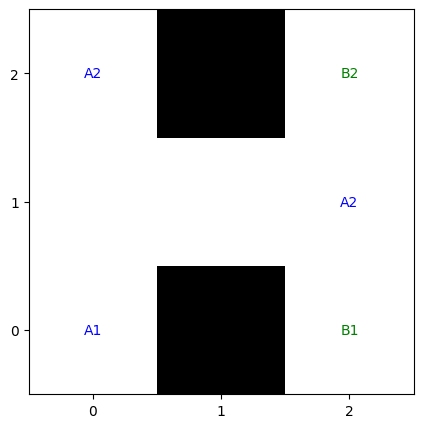

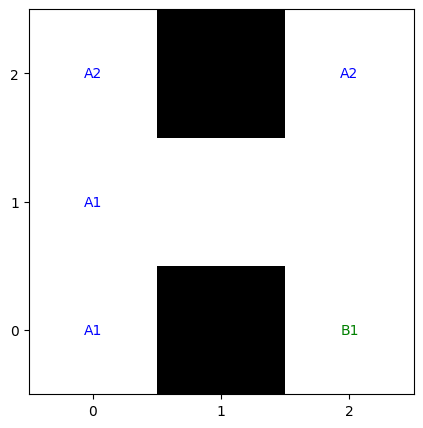

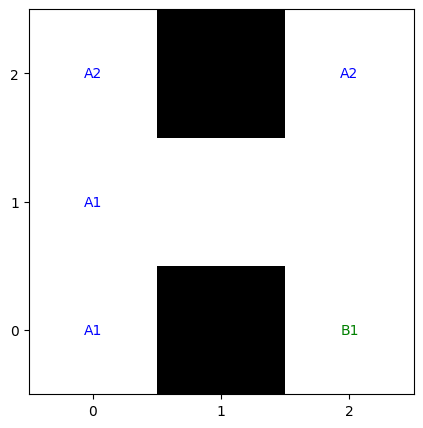

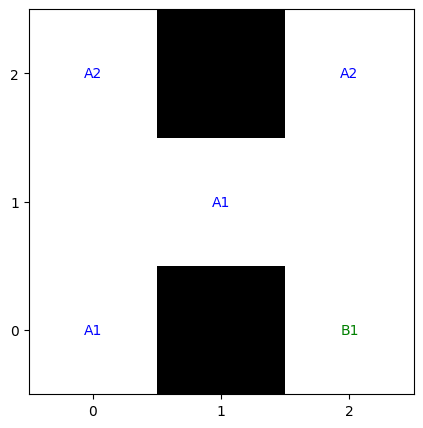

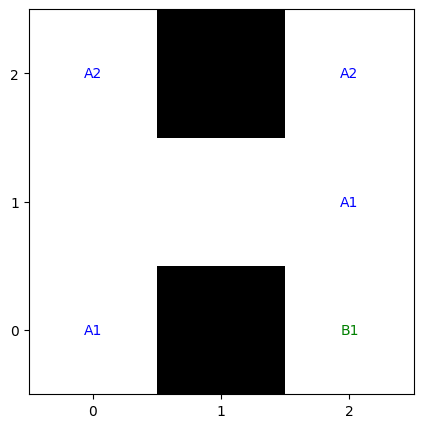

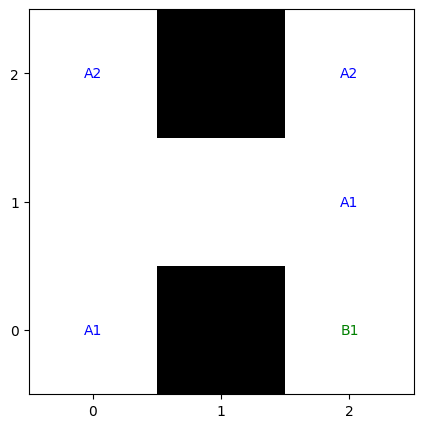

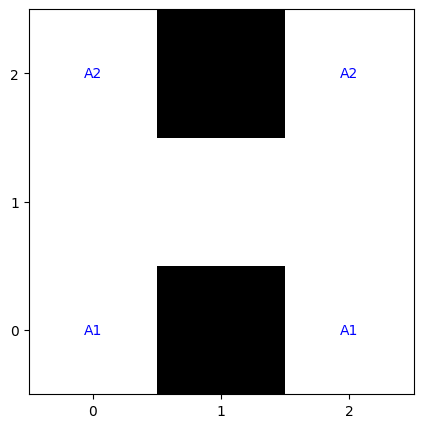

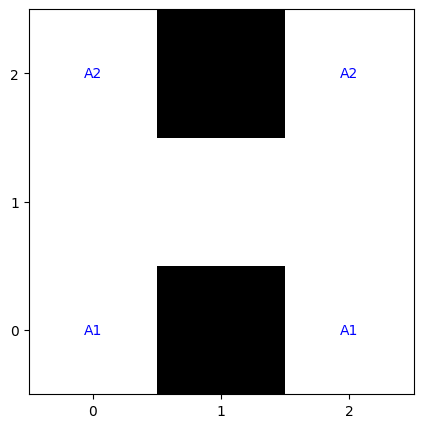

Episode: 6


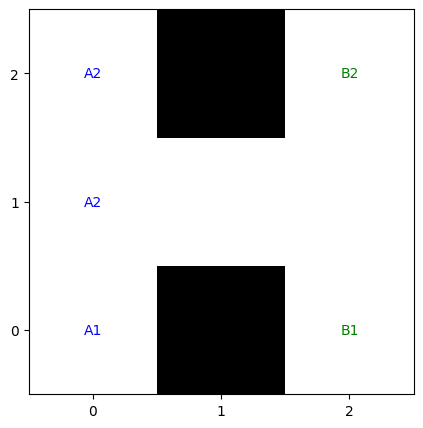

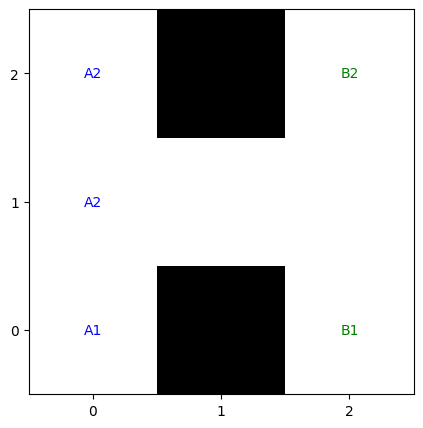

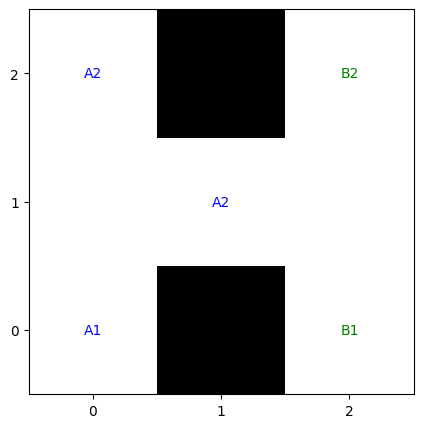

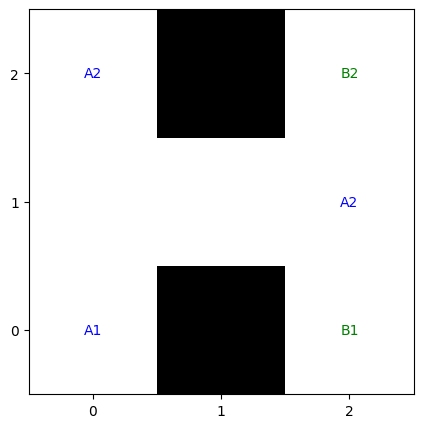

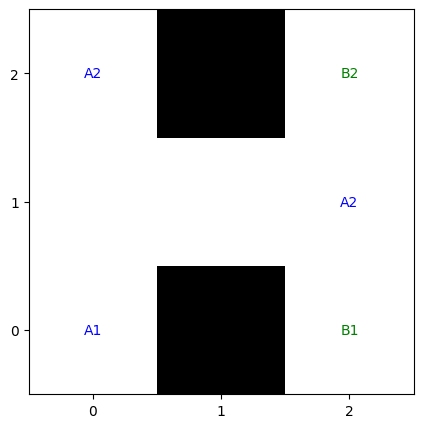

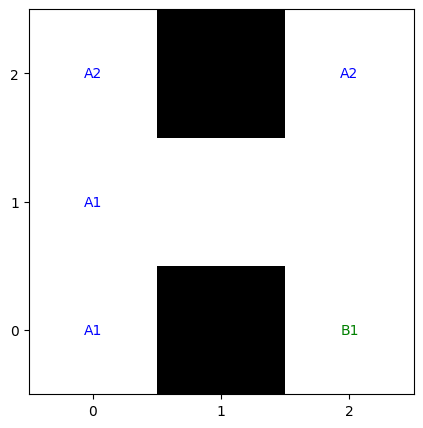

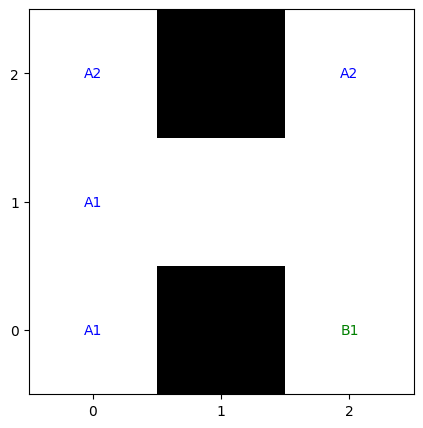

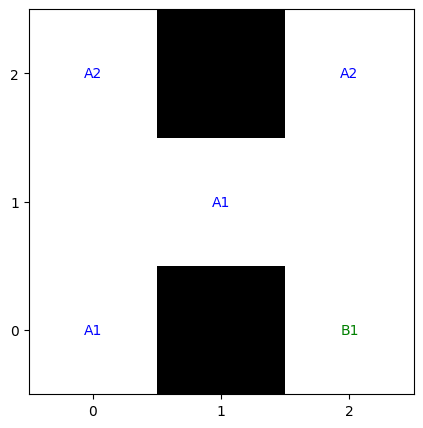

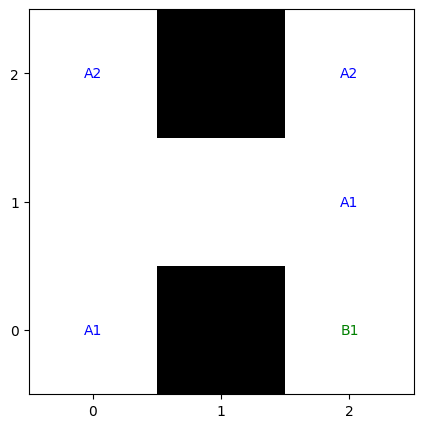

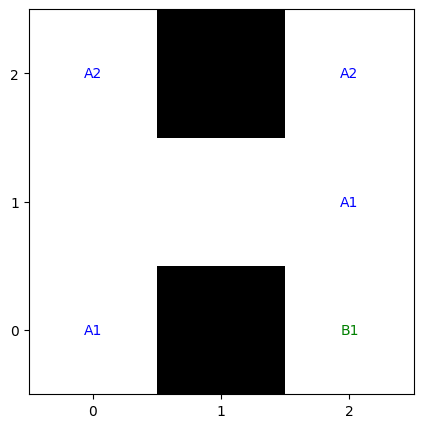

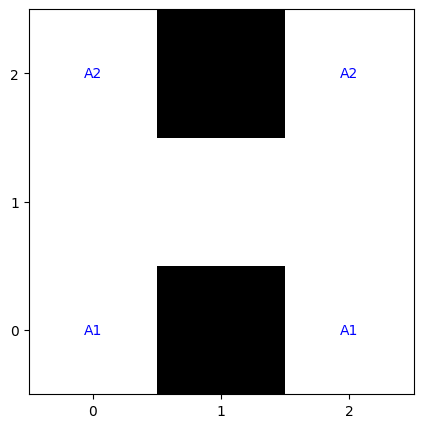

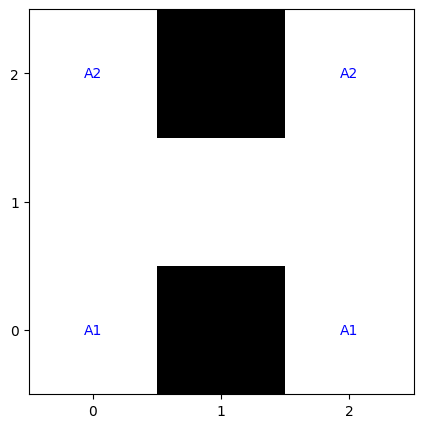

Episode: 7


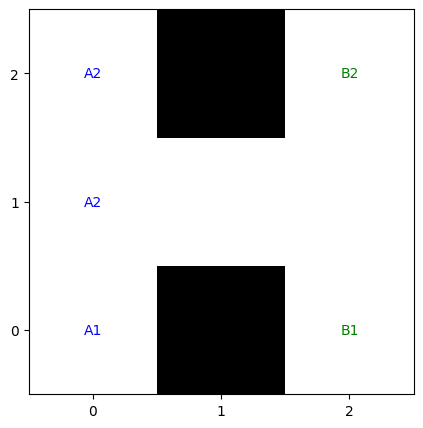

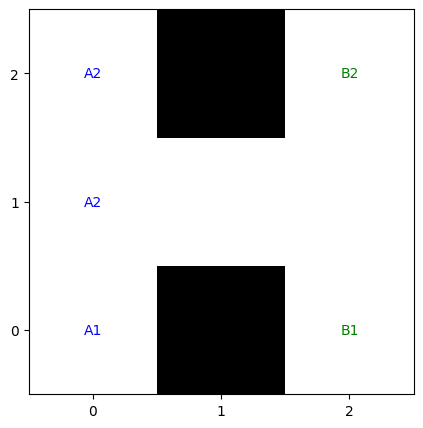

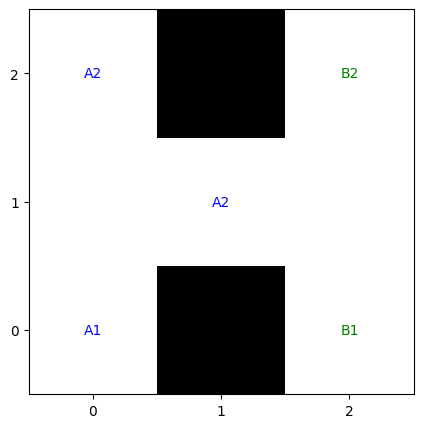

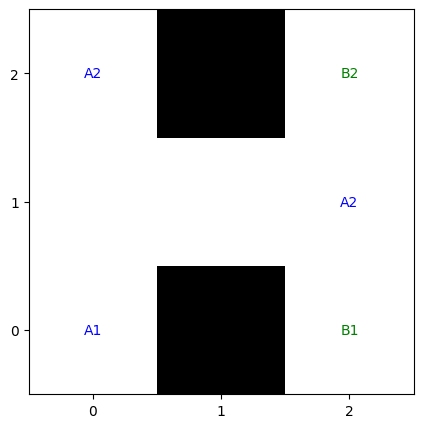

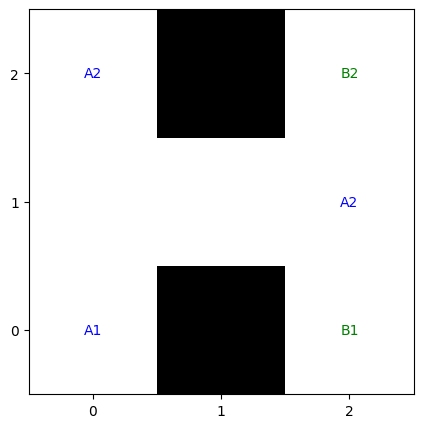

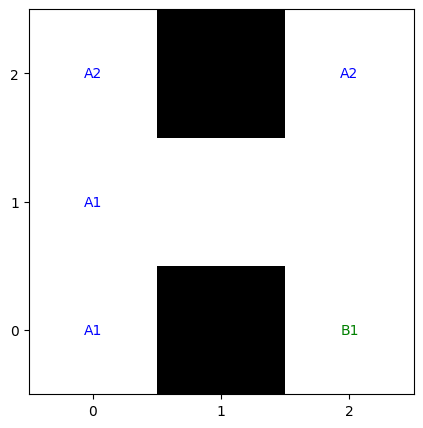

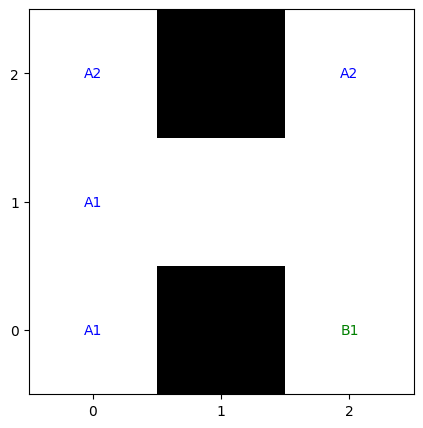

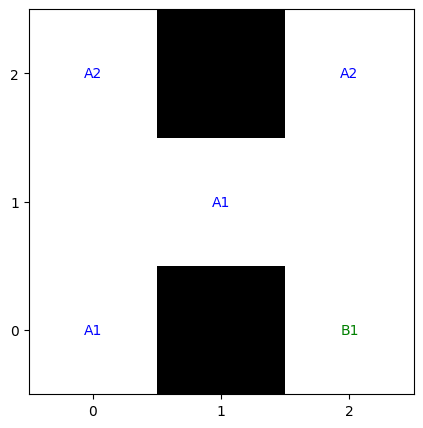

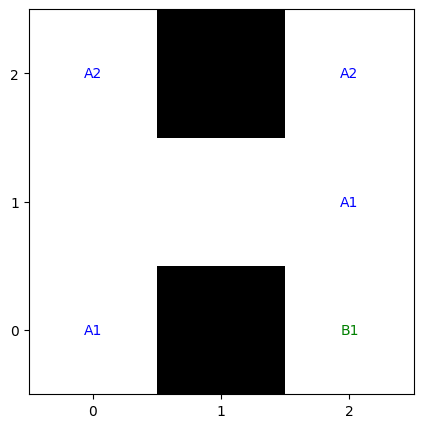

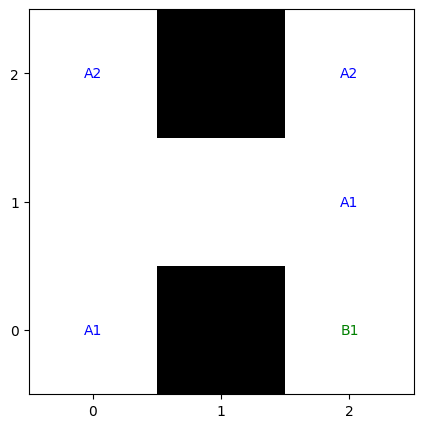

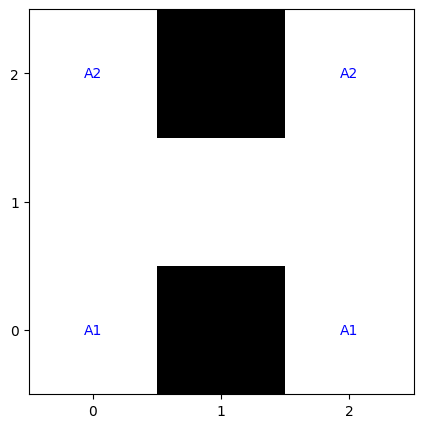

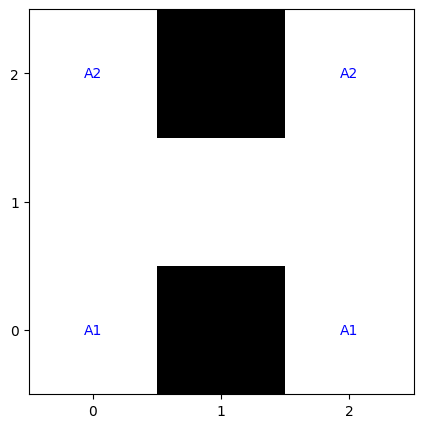

Episode: 8


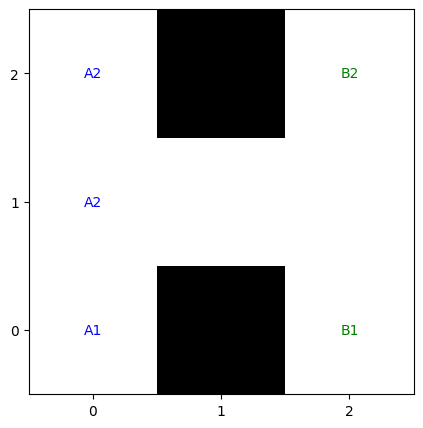

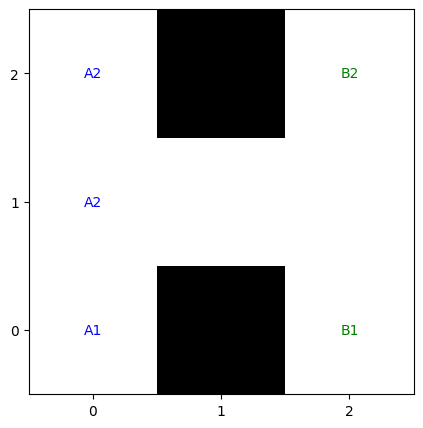

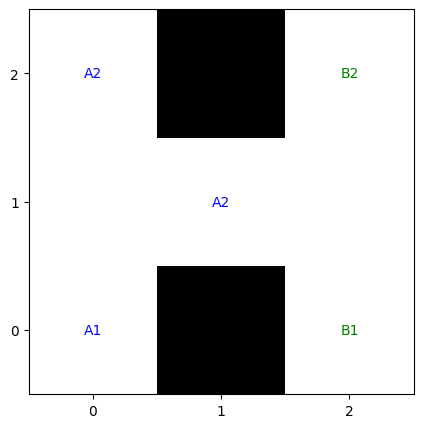

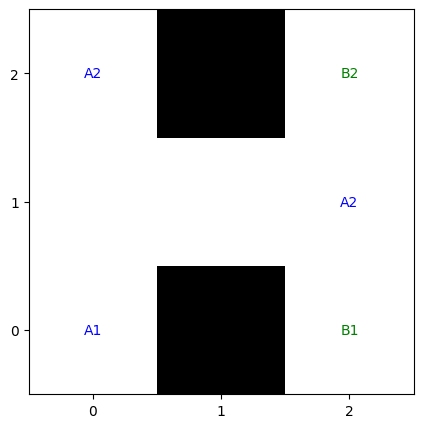

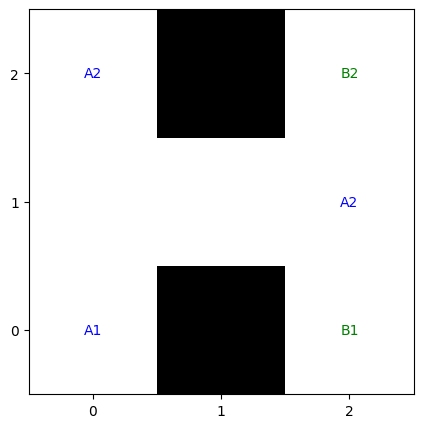

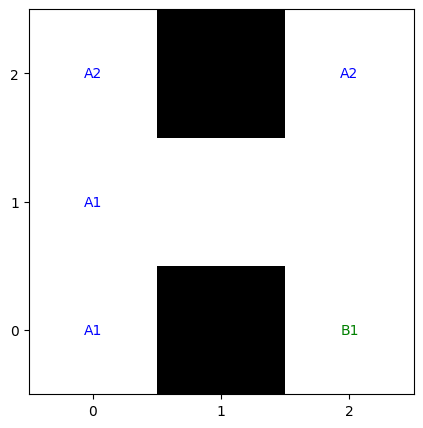

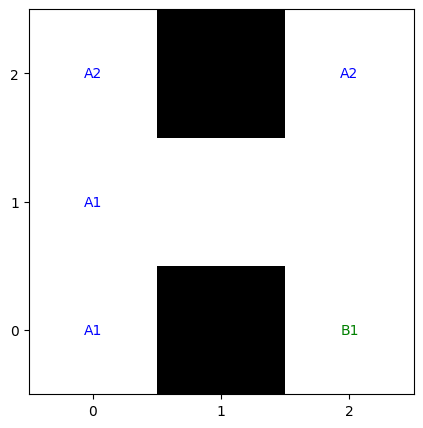

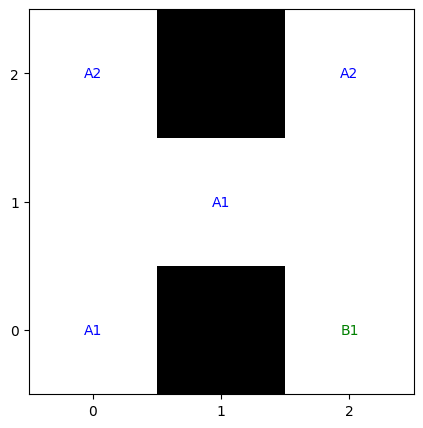

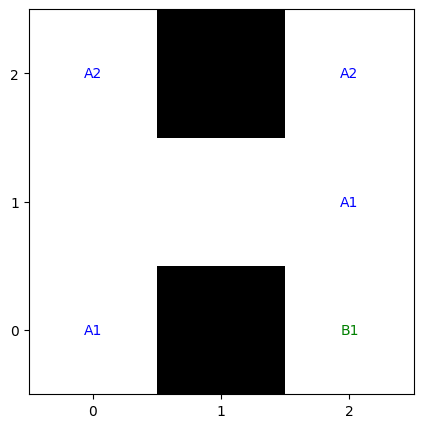

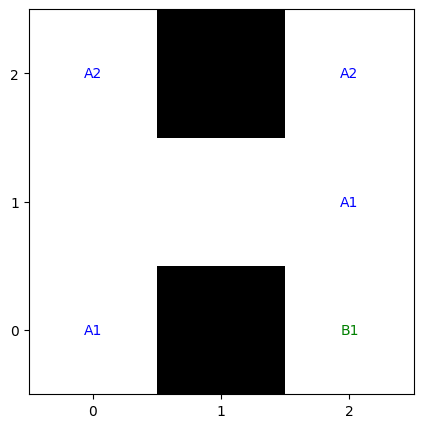

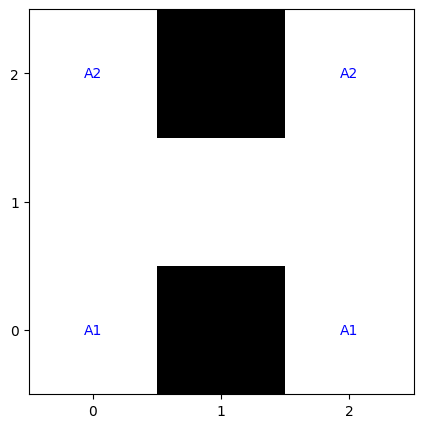

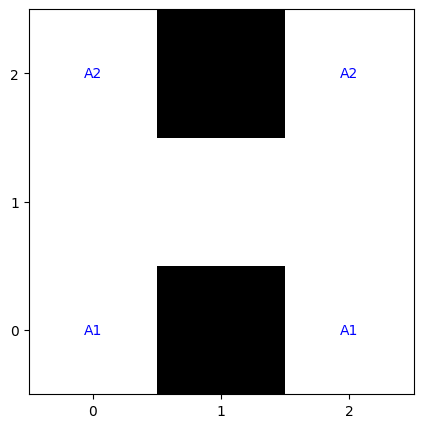

Episode: 9


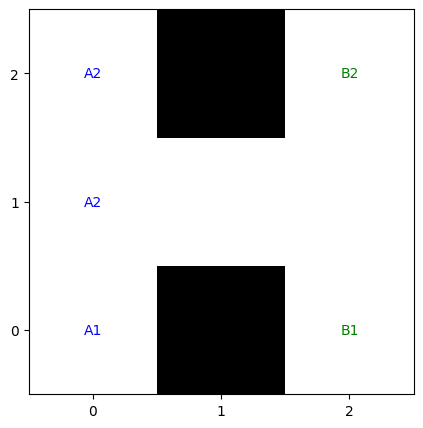

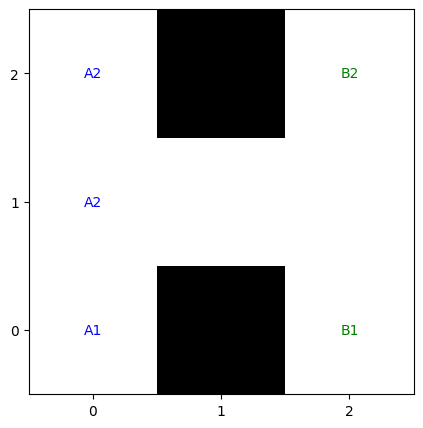

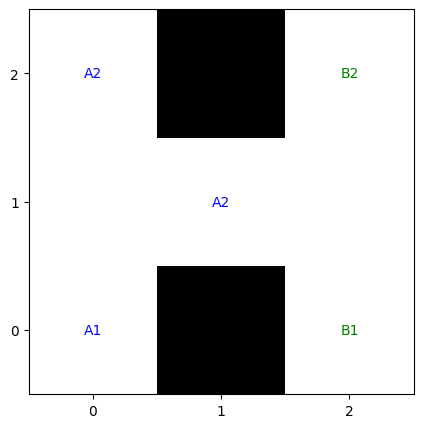

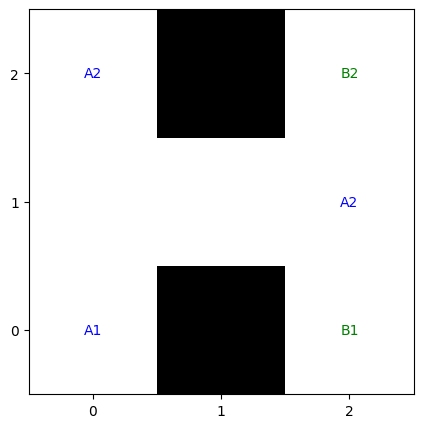

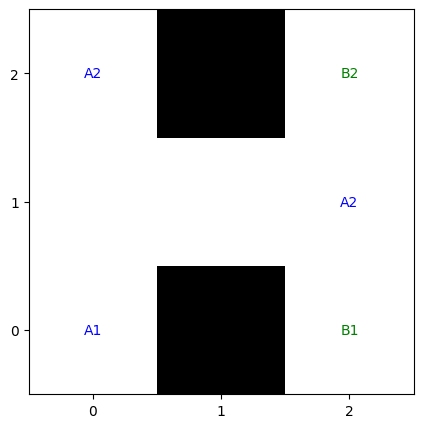

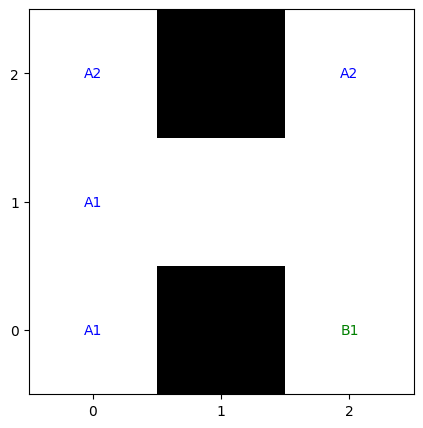

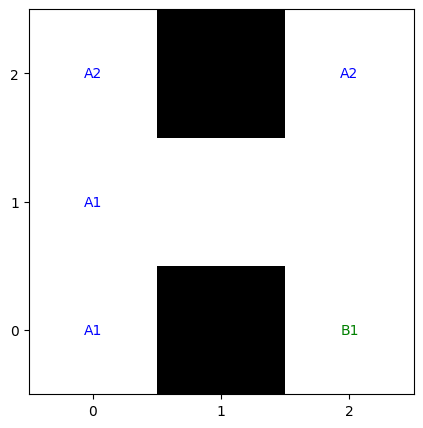

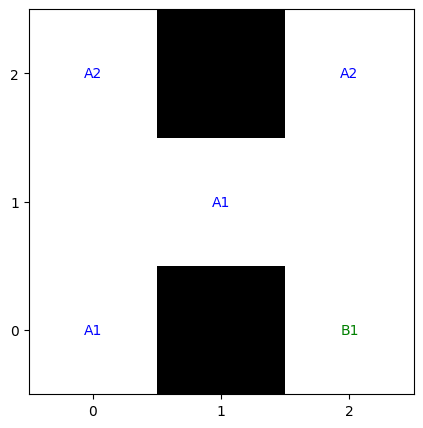

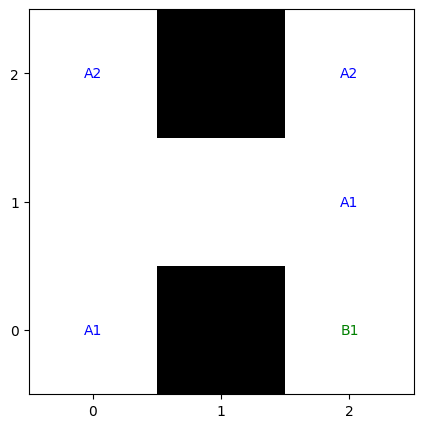

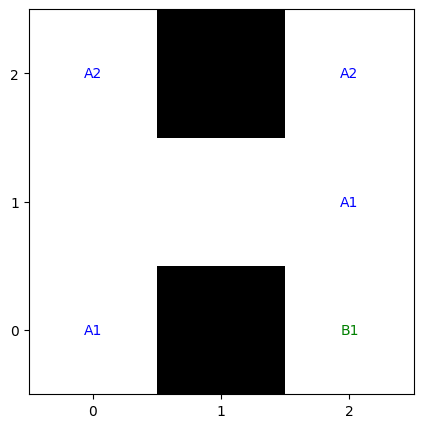

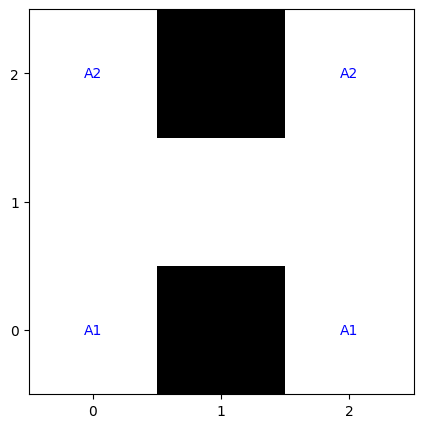

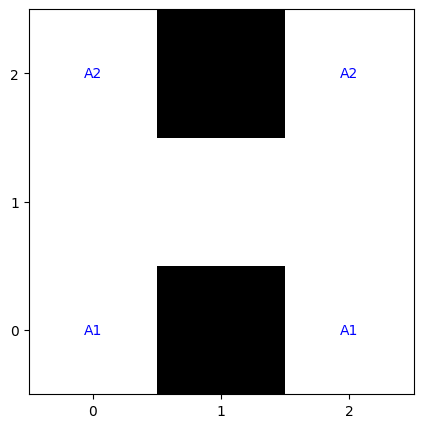

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Define constants for actions
ACTION_FORWARD = 0
ACTION_REVERSE = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTION_WAIT = 4

# Define the environment
class WarehouseEnv:
    def __init__(self, grid):
        self.grid = grid
        self.rows, self.cols = grid.shape
        self.start_positions = {}
        self.destination_positions = {}
        self.obstacles = []
        self.find_positions()
        self.reset()

    def find_positions(self):
        """Identify the positions of the autobots and destinations."""
        for i in range(self.rows):
            for j in range(self.cols):
                cell = self.grid[i, j]
                if cell.startswith('A'):
                    self.start_positions[cell] = (i, j)
                elif cell.startswith('B'):
                    self.destination_positions[cell] = (i, j)
                elif cell == 'X':
                    self.obstacles.append((i, j))

    def reset(self):
        """Reset the environment to the initial state."""
        self.autobots = []
        for bot_name, start_pos in self.start_positions.items():
            dest_name = 'B' + bot_name[1:]  # Find the corresponding destination
            dest_pos = self.destination_positions.get(dest_name)
            if dest_pos is None:
                raise ValueError(f"Destination not found for bot {bot_name}")
            self.autobots.append({
                'name': bot_name,
                'row': start_pos[0],
                'col': start_pos[1],
                'direction': 'up',
                'destination_row': dest_pos[0],
                'destination_col': dest_pos[1],
                'reached': False  # Track if the bot has reached its destination
            })
        return self.get_state()

    def get_state(self):
        """Get the current state representation."""
        state = 0
        for i, autobot in enumerate(self.autobots):
            direction_index = {'up': 0, 'down': 1, 'left': 2, 'right': 3}[autobot['direction']]
            state += (autobot['row'] * self.cols + autobot['col'] + direction_index * self.rows * self.cols) * (5 ** i)
        return state % (self.rows * self.cols * 4 ** len(self.autobots))

    def step(self, actions):
        """Take a step in the environment based on actions taken by autobots."""
        done = all(autobot['reached'] for autobot in self.autobots)  # Check if all reached
        reward = 0

        for i, autobot in enumerate(self.autobots):
            if not autobot['reached']:  # Only move the autobot if it hasn't reached its destination
                self.execute_action(autobot, actions[i])
                if self.is_at_destination(autobot):
                    reward += 100  # Reward for reaching destination
                    autobot['reached'] = True  # Mark as reached

        return self.get_state(), reward, done

    def execute_action(self, autobot, action):
        """Execute the given action for the autobot."""
        if action == ACTION_FORWARD:
            self.move_autobot(autobot, 'forward')
        elif action == ACTION_REVERSE:
            self.move_autobot(autobot, 'reverse')
        elif action == ACTION_LEFT:
            autobot['direction'] = self.turn('left', autobot['direction'])
        elif action == ACTION_RIGHT:
            autobot['direction'] = self.turn('right', autobot['direction'])
        elif action == ACTION_WAIT:
            pass  # No movement, just wait

    def move_autobot(self, autobot, move_type):
        """Move the autobot in the specified direction."""
        current_row, current_col = autobot['row'], autobot['col']
        new_row, new_col = self.get_new_position(current_row, current_col, autobot['direction'], move_type)

        if self.is_valid_move(new_row, new_col):
            autobot['row'], autobot['col'] = new_row, new_col

    def get_new_position(self, row, col, direction, move_type):
        """Calculate new position based on current position, direction, and move type."""
        move_offsets = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1),
        }
        dy, dx = move_offsets[direction] if move_type == 'forward' else (-move_offsets[direction][0], -move_offsets[direction][1])
        return row + dy, col + dx

    def is_valid_move(self, row, col):
        """Check if the move is valid (within bounds and not into an obstacle)."""
        return 0 <= row < self.rows and 0 <= col < self.cols and self.grid[row, col] != 'X'

    def is_at_destination(self, autobot):
        """Check if the autobot has reached its destination."""
        return autobot['row'] == autobot['destination_row'] and autobot['col'] == autobot['destination_col']

    def turn(self, turn_direction, current_direction):
        """Change the direction of the autobot based on turn direction."""
        directions = ['up', 'right', 'down', 'left']
        idx = directions.index(current_direction)
        return directions[(idx - 1) % 4] if turn_direction == 'left' else directions[(idx + 1) % 4]

# Q-Learning Agent
class QLearningAgent:
    def __init__(self, state_space_size, action_space_size, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay_rate=0.99):
        self.q_table = np.zeros((state_space_size, action_space_size))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay_rate = exploration_decay_rate

    def choose_action(self, state):
        """Choose an action based on the current state using an epsilon-greedy strategy."""
        if random.uniform(0, 1) < self.exploration_rate:
            return random.choice(np.arange(ACTION_WAIT + 1))  # Choose random action
        return np.argmax(self.q_table[state, :])  # Choose best action

    def learn(self, state, actions, reward, next_state, done):
        """Update the Q-table based on the action taken and the reward received."""
        for i, action in enumerate(actions):
            target = reward + (self.discount_factor * np.max(self.q_table[next_state, :]) if not done else 0)
            self.q_table[state, action] += self.learning_rate * (target - self.q_table[state, action])

    def decay_exploration_rate(self):
        """Decay the exploration rate after each episode."""
        self.exploration_rate *= self.exploration_decay_rate

# Training function
def train(env, agent, num_episodes=1000):
    """Train the Q-learning agent for a specified number of episodes."""
    total_rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            actions = [agent.choose_action(state) for _ in range(len(env.autobots))]
            next_state, reward, done = env.step(actions)
            agent.learn(state, actions, reward, next_state, done)
            state = next_state
            total_reward += reward

        total_rewards.append(total_reward)
        agent.decay_exploration_rate()

        if episode % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {episode}, Total Reward: {total_reward}")
    return total_rewards

# Testing function
def test(env, agent, num_episodes=10):
    """Test the trained agent in the environment."""
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        print(f"Episode: {episode}")
        while not done:
            actions = [agent.choose_action(state) for _ in range(len(env.autobots))]
            next_state, reward, done = env.step(actions)
            state = next_state
            render_grid(env)

# Visualization of the Warehouse Grid
def render_grid(env):
    """Render the current state of the warehouse grid."""
    plt.figure(figsize=(5, 5))
    grid_copy = np.copy(env.grid)
    for autobot in env.autobots:
        grid_copy[autobot['row'], autobot['col']] = autobot['name']  # Display bot name
    plt.imshow(grid_copy == 'X', cmap='Greys', vmin=0, vmax=1)
    for i in range(env.rows):
        for j in range(env.cols):
            if grid_copy[i, j].startswith('A'):
                plt.text(j, i, grid_copy[i, j], ha='center', va='center', color='blue')
            elif grid_copy[i, j].startswith('B'):
                plt.text(j, i, grid_copy[i, j], ha='center', va='center', color='green')
    plt.xticks(range(env.cols))
    plt.yticks(range(env.rows))
    plt.gca().invert_yaxis()  # Invert y-axis to match grid layout
    plt.show()

# Example Warehouse Grid
warehouse_grid = np.array([
    # ['A1', '.', '.', 'X', 'B1'],
    # ['.', 'X', '.', '.', '.'],
    # ['A3', '.', 'X', '.', '.'],
    # ['A2', '.', '.', '.', 'B2'],
    # ['.', 'X', '.', 'B3', '.']
     ['A1','X','B1'],
  ['.','.','.'],
   ['A2','X','B2']
])

# Create the environment and agent
env = WarehouseEnv(warehouse_grid)
agent = QLearningAgent(env.rows * env.cols * 4 ** len(env.autobots), 5)

# Train the agent
total_rewards = train(env, agent)

# Plot the rewards
plt.plot(total_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-Learning Training Rewards")
plt.show()

# Test the trained agent
test(env, agent)
